# Questão 3

Determine a solução numérica aproximada da seguinte Equação Diferencial Ordinária no intervalo
[0; 1], com o passo $h = 0,001$ para Método de Euler e $h = 0,01$ para o Método Runge-Kutta de 4a ordem. Plote um
gráfico para cada Método em separado e imprima o valor de $y(1)$ para os dois métodos com dez cadas decimais após
a virgula.

<center>
$\left\{\begin{array}{lll}
                y^`(x) = -2yx & \forall x \in [0:1] & \\
                y(0) = 1
            \end{array}\right.
\quad$
</center>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [43]:
h_runge_kutta = 0.01
h_euler = 0.001
x0 = 0
xf = 1
y = 1

In [50]:
#Funcao derivada(x)
def dydx(x, y):
    return -2*y*x

In [51]:
#Equacao Diferencial Ordinaria
def edo(x,y):
    return -2*y*x

In [52]:
#Metodo de Euler
def euler(x0, xf, y0, h):
    
    aux_x = x0
    aux_y = y0
    
    while aux_x < xf:
        if(y0 == 0):
            aux_y2 = aux_y +h*1
        else:
            aux_y2 = aux_y +h*edo(aux_x,aux_y)
            
        aux_y = aux_y2
        aux_x += h
    
    return aux_y

In [53]:
#Metodo Runge-Kutta
def rungeKutta(x0, y0, x, h):
    n = (int)((x - x0)/h)
    y = y0
    
    for i in range(1, n + 1):
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)
 
        # Atualiza o próximo valor do y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
 
        # Atualiza o próximo valor do x
        x0 = x0 + h
    return y

## Resultado Euler: 

In [48]:
print('y(%0.2f) = %0.10f' % (xf, euler(x0, xf, y, h_euler)))

y(1.00) = 0.3680022108


## Resultado Runge-Kutta:

In [49]:
print('y(%0.2f) = %0.10f' % (xf, rungeKutta(x0, y, xf, h_runge_kutta)))

y(1.00) = 0.3678794413


## Gráfico do Método de Euler

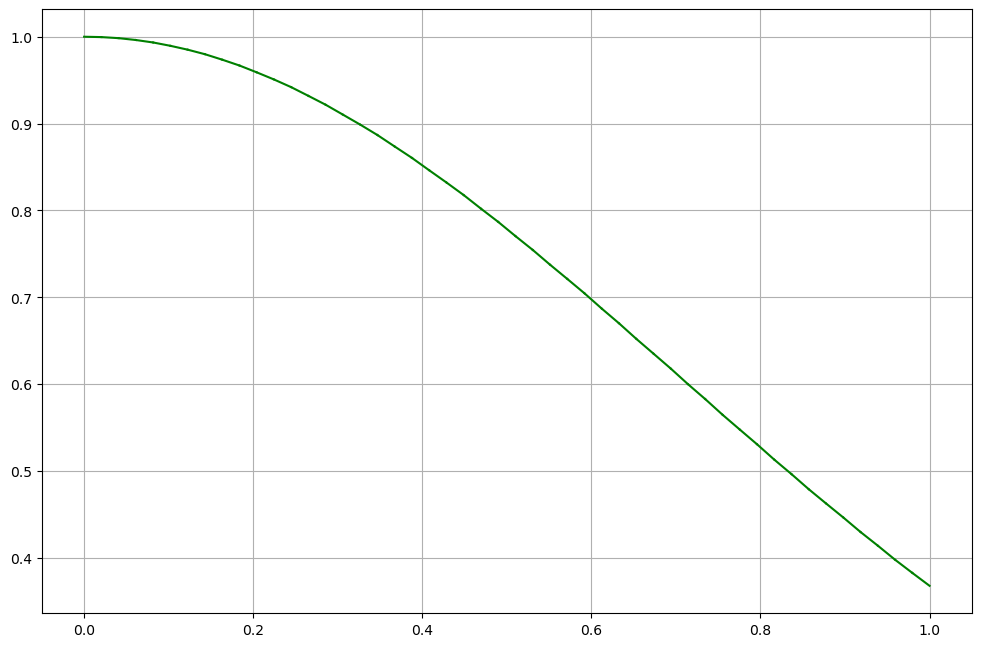

In [35]:
fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = np.linspace(0, 1)

lastX = 0
lastY = 0

for i in np.linspace(0, 1):
    if i == 0:
        plt.plot( i, euler(x0, i, y, h_euler), color='green');
    else:
        plt.plot([lastX, i], [lastY, euler(x0, i, y, h_euler)], color='green');
    lastX = i
    lastY = euler(x0, i, y, h_euler)

plt.grid()
plt.show()

## Gráfico do Método de Runge-Kutta

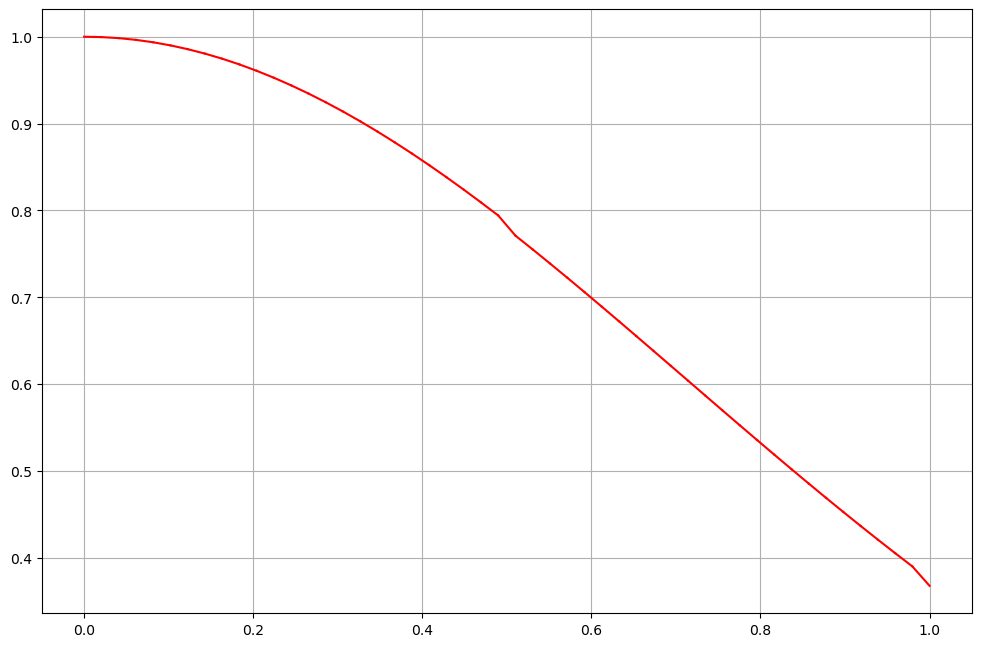

In [42]:
fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = np.linspace(0, 1)

lastX = 0
lastY = 0

for i in np.linspace(0, 1):
    if i == 0:
        plt.plot(i, rungeKutta(x0, y, i, h_runge_kutta), color='red');
    else:
        plt.plot([lastX, i], [lastY, rungeKutta(x0, y, i, h_runge_kutta)], color='red');
    lastX = i
    lastY = rungeKutta(x0, y, i, h_runge_kutta)

plt.grid()
plt.show()